In [87]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [88]:
df=pd.read_csv(r'C:/Users/navee/Downloads/Boston.csv')

In [89]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [90]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [91]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [92]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


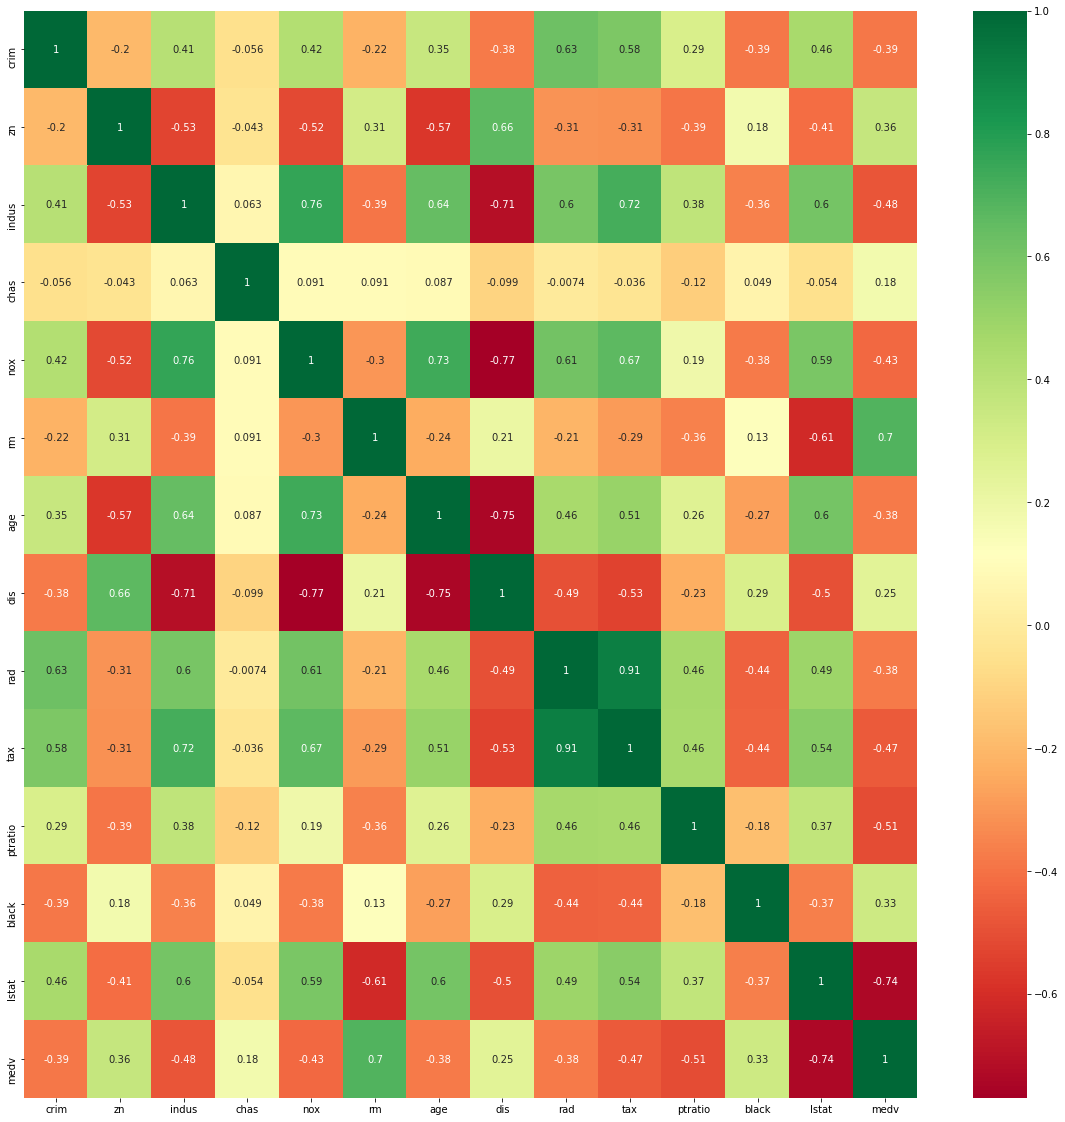

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

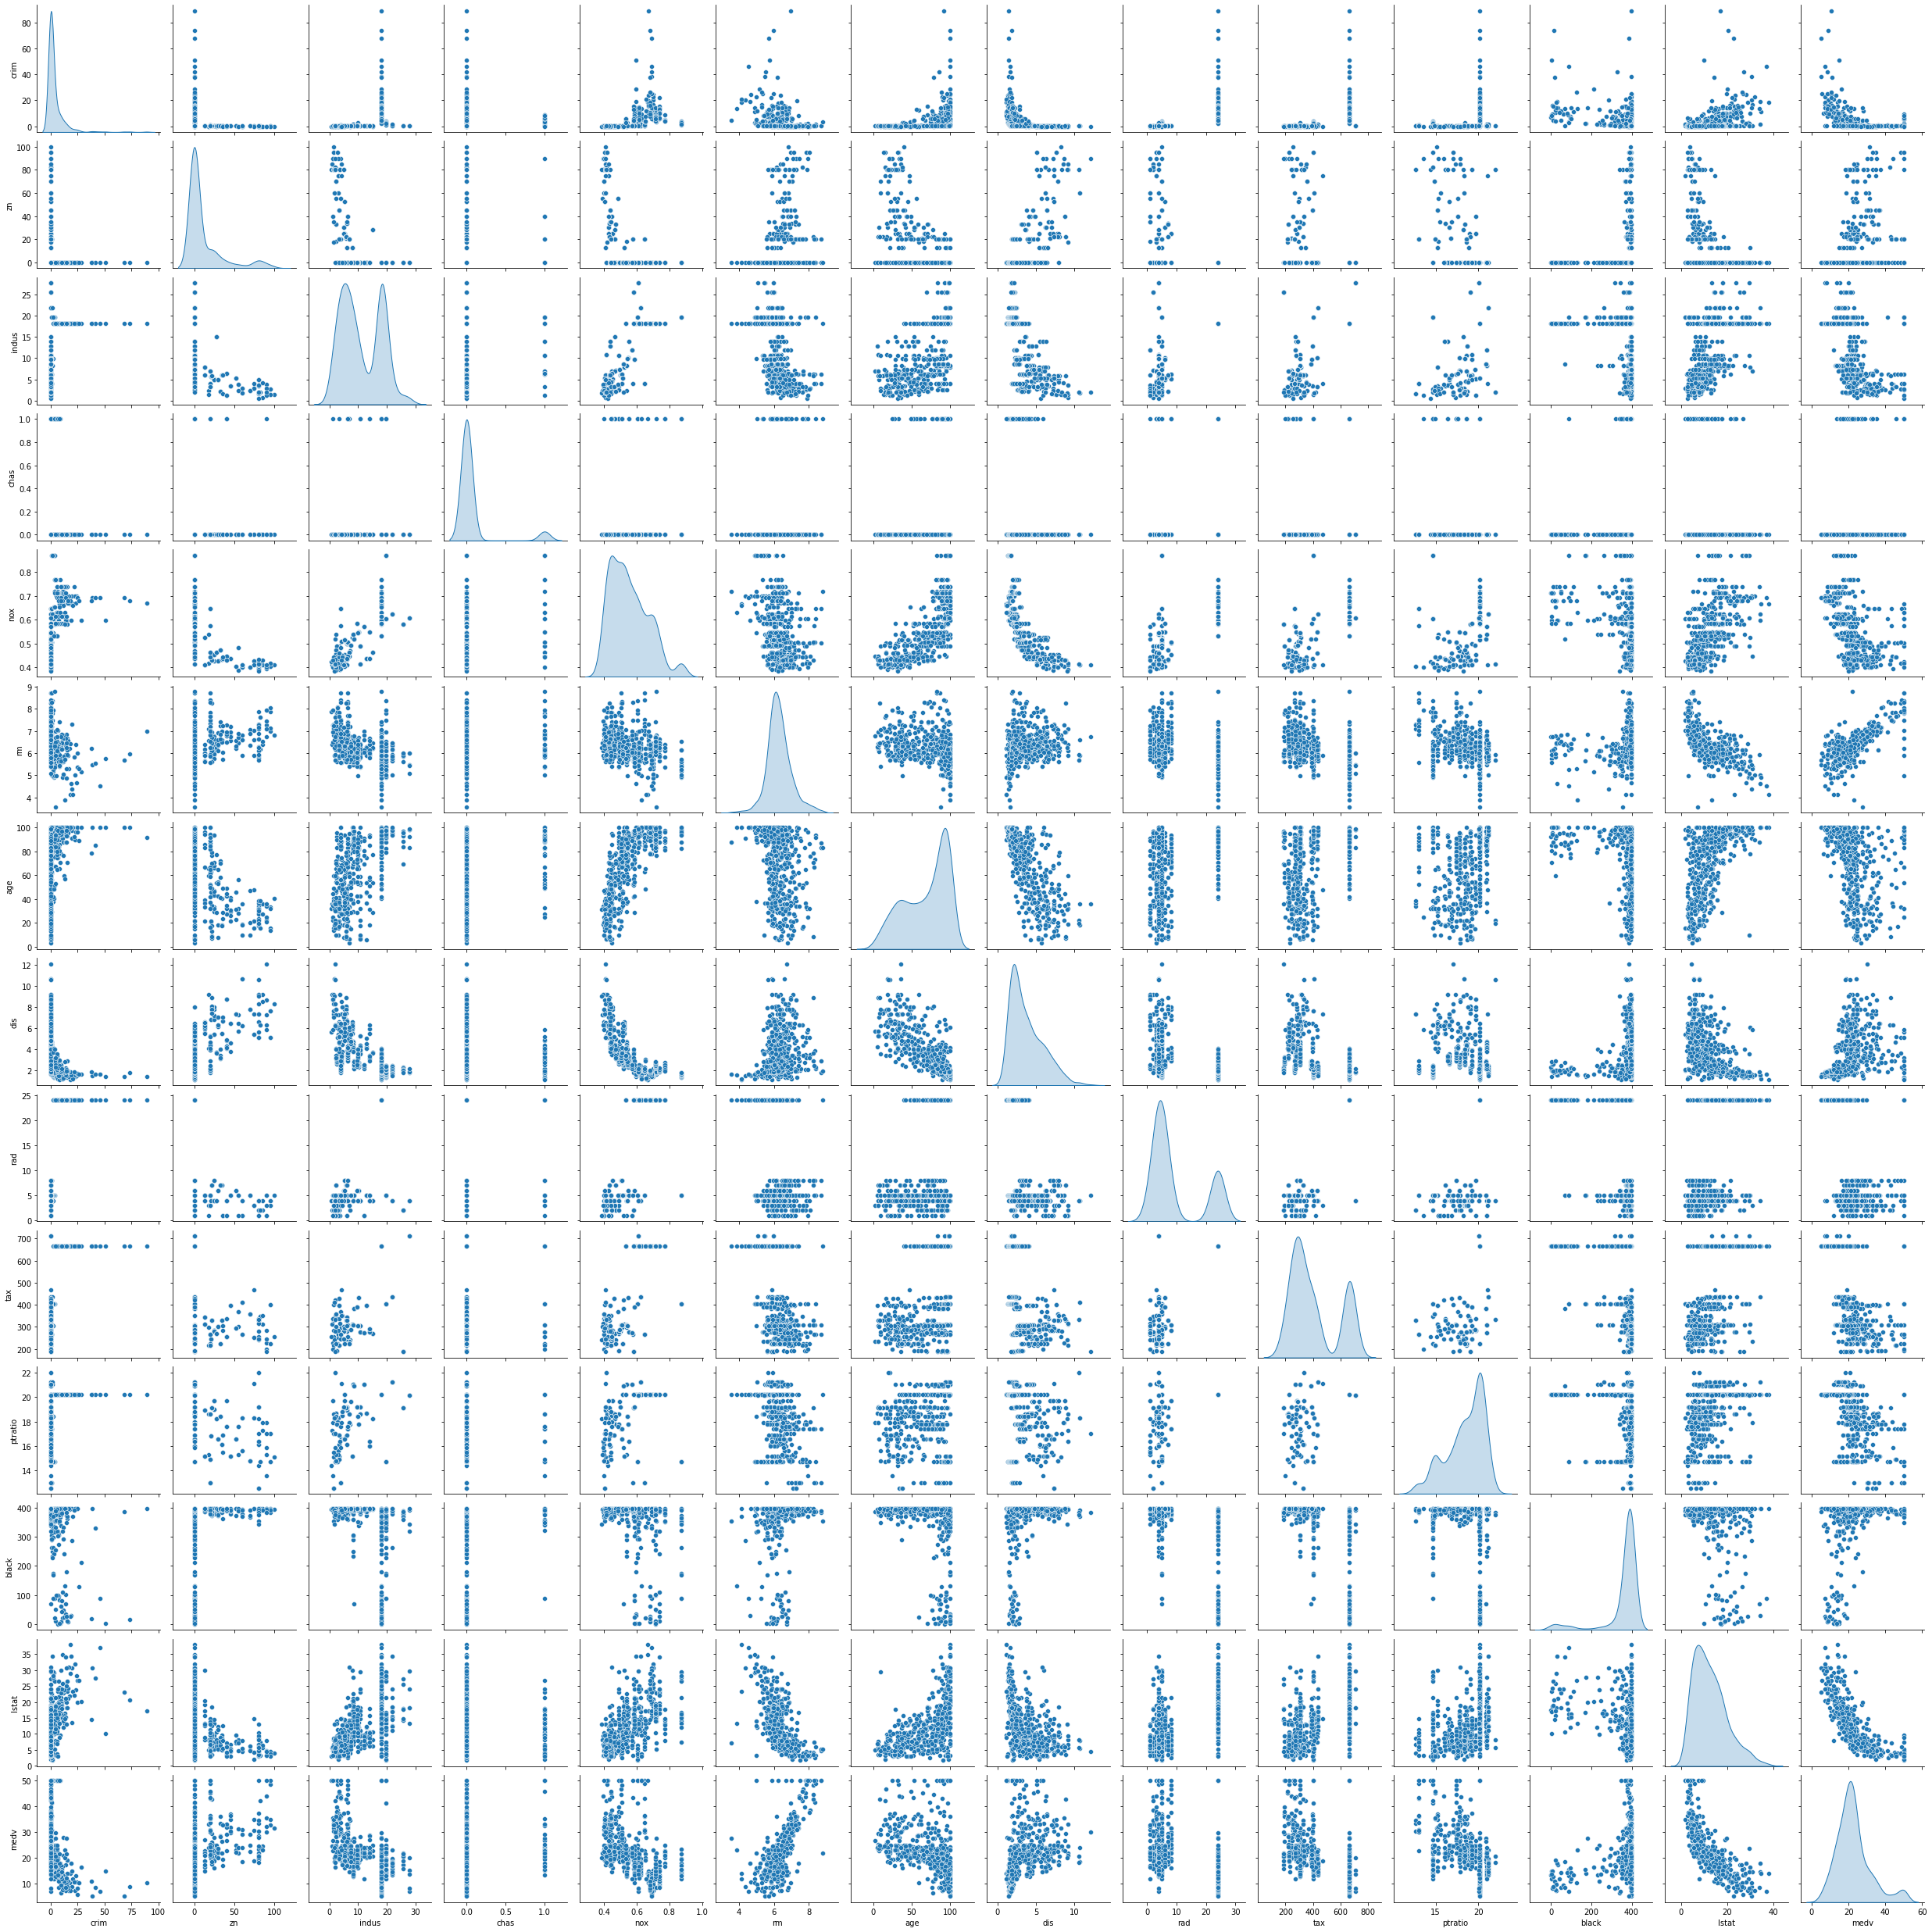

In [97]:
import seaborn as sns
sns.pairplot(data=df,diag_kind='kde')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# pipeline and spliting the data

In [9]:
X=df.drop(columns=['medv'])
y=df.medv

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=22)

In [11]:
scalar_transformer=Pipeline(steps=[('scaling',StandardScaler())])

In [12]:
features=X.columns

In [13]:
features

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [14]:
preprocessor1=ColumnTransformer(transformers=[
      ('T1',scalar_transformer,features)
      ],sparse_threshold=0)

# basic linear regression model

In [15]:
lr=LinearRegression()
model=Pipeline(steps=[('preprocessor1',preprocessor1),
                ('lr_model',lr)
                ])

# ridge regularisation model

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
model2=Pipeline(steps=[('preprocessor1',preprocessor1),
                ('ridge_model',ridge_regressor)
                ])

In [17]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('T1',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object'))])),
                ('lr_model', LinearRegression())])

In [18]:
lr_pred=model.predict(X_test)

In [66]:
lr_pred

array([27.87925408, 31.37382373, 20.71277013, 32.97642595, 19.74753418,
       18.9792736 , 20.6929465 , 19.37899379, 19.35857948, 32.81867704,
       20.65572299, 27.47510825, 15.1739389 , 19.47366601, 36.90477797,
       18.25589971,  9.24723799, 18.18046566, 30.5016638 , 23.90368362,
       19.06815846, 34.24078056, 30.18455767, 17.16498856, 34.85033441,
       26.31648721, 34.3591046 , 27.20782662, 18.86212024, 14.61507737,
       30.96133796, 15.8808414 , 36.94986862,  5.60619212, 15.97283309,
       17.16481462,  6.59224482, 19.96777491, 40.98356572, 28.7054902 ,
       24.97852496, 17.54167592, 39.21885795,  6.58382645, 21.65166113,
       25.14677818, 20.5289506 , 20.15338027, 17.49443157, 25.80568258,
        7.94209355])

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, lr_pred)

0.7377445682838631

In [20]:
model2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('T1',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object'))])),
                ('ridge_model',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                    0.01, 1, 5, 10, 20, 30, 35,
                                                    40, 45, 50, 55, 100]},
                              scoring='neg_mean_squared_error'))])

In [21]:
y_pred=model2.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7385489784889916

# Lasso regularisation model 

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(ls,parameters,scoring='neg_mean_squared_error',cv=10)
model3=Pipeline(steps=[('preprocessor1',preprocessor1),
                ('ridge_model',lasso_regressor)
                ])
model3.fit(X_train,y_train)

C:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.56586952190264, tolerance: 3.3934689388753063
  model = cd_fast.enet_coordinate_descent(
C:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 816.0602765243784, tolerance: 3.293942669926651
  model = cd_fast.enet_coordinate_descent(
C:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 803.7204455019646, tolerance: 3.3630322200489
  model = cd_fast.enet_coordinate_descent(
C:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('T1',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object'))])),
                ('ridge_model',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                    0.01, 1, 5, 10, 20, 30, 35,
                                                    40, 45, 50, 55, 100]},
                              scoring='neg_mean_squared_error'))])

In [23]:
ls_pred=model3.predict(X_test)

In [24]:
r2_score(y_test, ls_pred)

0.7386485968296077

# saving the models

In [53]:
import pickle
pickle.dump(model,open('Linear_model.pkl','wb'))
pickle.dump(model,open('Lasso_model.pkl','wb'))
pickle.dump(model,open('Ridge_model.pkl','wb'))